In [1]:
import pandas as pd
import pymysql
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import random
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
yelp = pymysql.connect("mydbinstance.cgtrqrbv6sj0.us-east-1.rds.amazonaws.com","stevens","stevens2017","yelp_db" )

In [3]:
yelp

In [4]:
user=pd.read_sql('select * from user',yelp)
user.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,---1lKK3aKOuomHnwAkAow,Monera,245,2007-06-04,67,22,9,15,3.97,2,3,2,1,0,5,9,9,9,9,0
1,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2,---cu1hq55BP9DWVXXKHZg,Jeb,57,2009-04-18,34,14,0,0,3.79,0,0,0,0,0,3,2,0,0,0,0
3,---fhiwiwBYrvqhpXgcWDQ,Jed,8,2011-04-20,2,3,1,0,2.78,0,0,0,0,0,0,0,0,0,0,0
4,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31,1,0,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0


In [5]:
user.shape

(1183362, 20)

In [6]:
business=pd.read_sql('select * from business',yelp)
business.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1


In [7]:
business.shape

(156639, 12)

In [8]:
restaurant=pd.read_sql('select * from Restaurant_business',yelp)
restaurant.shape

(51613, 12)

In [9]:
size_city=pd.DataFrame(restaurant.groupby(['city']).size())
size_city.head()

,0
city,
,1
AGINCOURT,1
Aberlady,1
Ahwatukee,5
Aichwald,2


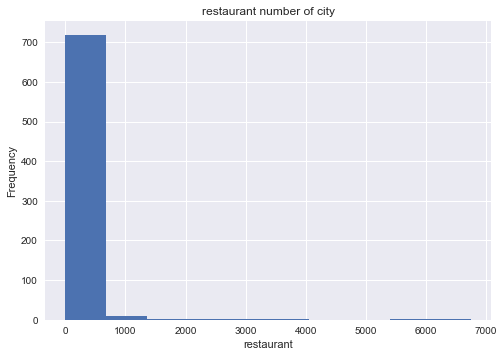

In [10]:
plt.hist(size_city[0])
plt.title("restaurant number of city")
plt.xlabel("restaurant")
plt.ylabel("Frequency")
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 5,5
plt.show()

In [11]:
max(size_city[0]) 

6750

In [12]:
size_city[(size_city[0]==max(size_city[0]))].index.tolist()

['Toronto']

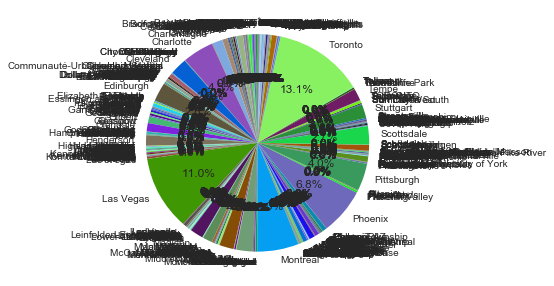

In [13]:
random.seed(123)
color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, size_city.shape[0])]
plt.pie(size_city,labels=size_city.index, colors=color,startangle = 90,autopct = '%3.1f%%')
from pylab import rcParams #set figure size
rcParams['figure.figsize'] = 15, 15
plt.show()